___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

<h1 style="text-align: center;">Deep Learning<br><br>Assignment-2 (CNN)<br><br>Image Classification with CNN<br><h1>

# Task and Dataset Info

Welcome to second assignment of Deep learning lesson. Follow the instructions and complete the assignment.

**Build an image classifier with Convolutional Neural Networks for the Fashion MNIST dataset. This data set includes 10 labels of different clothing types with 28 by 28 *grayscale* images. There is a training set of 60,000 images and 10,000 test images.**

    Label	Description
    0	    T-shirt/top
    1	    Trouser
    2	    Pullover
    3	    Dress
    4	    Coat
    5	    Sandal
    6	    Shirt
    7	    Sneaker
    8	    Bag
    9	    Ankle boot

# Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")
plt.rcParams["figure.figsize"] = (10,6)
sns.set_style("whitegrid")
pd.set_option('display.float_format', lambda x: '%.3f' % x)
# Set it None to display all rows in the dataframe
# pd.set_option('display.max_rows', None)
# Set it to None to display all columns in the dataframe
pd.set_option('display.max_columns', None)

In [2]:
import tensorflow as tf
tf.config.list_physical_devices("GPU")

[]

# Recognizing and Understanding Data

**TASK 1: Run the code below to download the dataset using Keras.**

In [3]:
from tensorflow.keras.datasets import fashion_mnist

(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


In [4]:
print("There are ", len(X_train), "images in the training dataset")     
print("There are ", len(X_test), "images in the test dataset")

There are  60000 images in the training dataset
There are  10000 images in the test dataset


In [5]:
# Checking the shape of one image
X_train[5].shape

(28, 28)

In [6]:
X_train[5]

array([[  0,   0,   0,   0,   1,   0,   0,   0,   0,  22,  88, 188, 172,
        132, 125, 141, 199, 143,   9,   0,   0,   0,   1,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   1,   0,   0,  20, 131, 199, 206, 196, 202, 242,
        255, 255, 250, 222, 197, 206, 188, 126,  17,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   1,   0,  35, 214, 191, 183, 178, 175, 168, 150,
        162, 159, 152, 158, 179, 183, 189, 195, 185,  82,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0, 170, 190, 172, 177, 176, 171, 169, 162,
        155, 148, 154, 169, 174, 175, 175, 177, 183, 188,  12,   0,   0,
          0,   0],
       [  0,   0,   0,   0,  25, 194, 180, 178, 174, 184, 187, 189, 187,
        184, 181, 189, 200, 197, 193, 190, 178, 175, 194,  90,   0,   0,
          0,   0],
       [  0,   0,   0,   0,  42, 218, 191, 197, 208, 204, 211, 209, 210,
        212, 211, 214, 215, 213, 214, 211, 211, 191, 200, 158,   0,   0,
          0,   0],
       [  

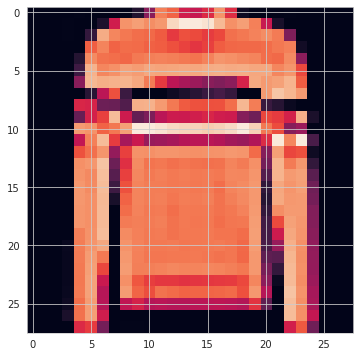

In [7]:
plt.imshow(X_train[5])

In [8]:
y_train[5]

2

In [9]:
y_train.shape

(60000,)

In [10]:
y_train

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [11]:
np.unique(y_train, return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8),
 array([6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000]))

**TASK 2: Use matplotlib to view an image from the data set. It can be any image from the data set.**

In [12]:
classes=["T-shirt/top", "Trouser","Pullover","Dress","Coat","Sandal","Shirt","Sneaker","Bag","Ankle boot"]

In [13]:
y_train[0] 

9

In [16]:
classes[y_train[0]]

'Ankle boot'

In [15]:
classes[int(y_train[0])]

'Ankle boot'

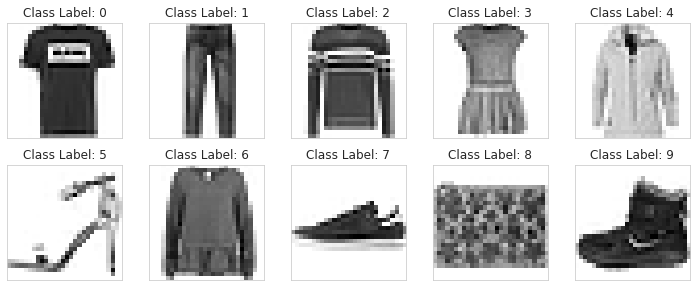

In [37]:
#To show the classes
plt.figure(figsize=(10, 10))
for i in range(0,10):
    plt.subplot(5, 5, i+1)
    plt.title(f"Class Label: {i}")
    plt.imshow(X_train[y_train == i][0], cmap=plt.cm.binary)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.tight_layout()

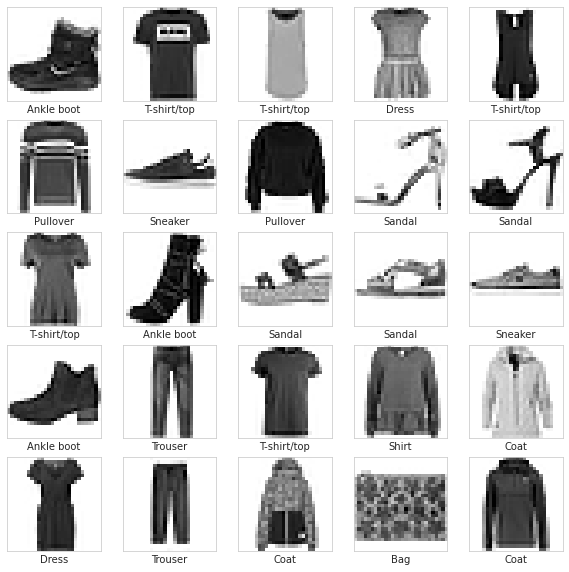

In [38]:
#First 25 images
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train[i] / 255.0, cmap=plt.cm.binary)
    plt.xlabel(classes[y_train[i]])
plt.show()

# Data Preprocessing

**TASK 3: Normalize the X train and X test data by dividing by the max value of the image arrays.**

In [19]:
X_train[5].min()

0

In [20]:
X_train[5].max()

255

In [21]:
# Normalize image pixels
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [22]:
X_train[5].min()

0.0

In [23]:
X_train[5].max()

1.0

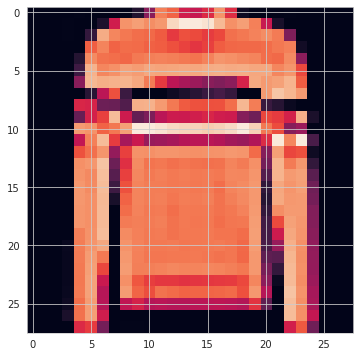

In [24]:
plt.imshow(X_train[5])

In [25]:
X_train.shape, X_test.shape

((60000, 28, 28), (10000, 28, 28))

In [26]:
y_train

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

**Task 4: Reshape the X arrays to include a 4 dimension of the single channel. Similar to what we did for the numbers MNIST data set.**

In [43]:
X_train = X_train.reshape(X_train.shape[0],28,28,1)

In [44]:
X_test = X_test.reshape(X_test.shape[0],28,28,1)

In [45]:
X_train.shape, X_test.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

In [51]:
X_train[0].shape

(28, 28, 1)

In [52]:
img_shape = X_train[0].shape

**TASK 5: Convert the y_train and y_test values to be one-hot encoded for categorical analysis by Keras.**

In [46]:
from tensorflow.keras.utils import to_categorical

In [49]:
Y_train = to_categorical(y_train, 10)
Y_test = to_categorical(y_test, 10)
Y_train.shape, Y_test.shape

((60000, 10), (10000, 10))

In [48]:
Y_train[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.], dtype=float32)

# Modeling

## Create the model

**TASK 5: Use Keras to create a model consisting of at least the following layers (but feel free to experiment):**

* 2D Convolutional Layer, filters=28 and kernel_size=(3,3)
* Pooling Layer where pool_size = (2,2) strides=(1,1)

* Flatten Layer
* Dense Layer (128 Neurons, but feel free to play around with this value), RELU activation

* Final Dense Layer of 10 Neurons with a softmax activation

**Then compile the model with these parameters: loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy']**

In [89]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout
from tensorflow.keras.layers import BatchNormalization

In [90]:
model = Sequential()

model.add(Conv2D(filters=28, kernel_size=(3,3), input_shape=img_shape, activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2), strides=(1,1)))
model.add(Conv2D(filters=64, kernel_size=(3,3), input_shape=img_shape, activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2), strides=(1,1)))
model.add(Conv2D(filters=28, kernel_size=(3,3), input_shape=img_shape, activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2), strides=(1,1)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Dense(64, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.1))
model.add(Dense(10, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

In [91]:
model.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_29 (Conv2D)          (None, 26, 26, 28)        280       
                                                                 
 max_pooling2d_29 (MaxPoolin  (None, 25, 25, 28)       0         
 g2D)                                                            
                                                                 
 conv2d_30 (Conv2D)          (None, 23, 23, 64)        16192     
                                                                 
 max_pooling2d_30 (MaxPoolin  (None, 22, 22, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_31 (Conv2D)          (None, 20, 20, 28)        16156     
                                                                 
 max_pooling2d_31 (MaxPoolin  (None, 19, 19, 28)     

##  Model Training 

**TASK 6: Train/Fit the model to the x_train set by using EarlyStop. Amount of epochs is up to you.**

In [92]:
from tensorflow.keras.callbacks import EarlyStopping

In [93]:
early_stop = EarlyStopping(monitor='val_loss', patience=2, restore_best_weights = True)

In [94]:
%%time
model.fit(X_train, Y_train, batch_size=32, epochs=50, validation_data=(X_test,Y_test),callbacks=[early_stop])

Epoch 1/50
1875/1875 [==============================] - 290s 154ms/step - loss: 0.4581 - accuracy: 0.8399 - val_loss: 0.3395 - val_accuracy: 0.8824
Epoch 2/50
1875/1875 [==============================] - 282s 150ms/step - loss: 0.3169 - accuracy: 0.8881 - val_loss: 0.2880 - val_accuracy: 0.8989
Epoch 3/50
1875/1875 [==============================] - 281s 150ms/step - loss: 0.2776 - accuracy: 0.9029 - val_loss: 0.2576 - val_accuracy: 0.9059
Epoch 4/50
1875/1875 [==============================] - 281s 150ms/step - loss: 0.2526 - accuracy: 0.9099 - val_loss: 0.2812 - val_accuracy: 0.9004
Epoch 5/50
1875/1875 [==============================] - 281s 150ms/step - loss: 0.2348 - accuracy: 0.9173 - val_loss: 0.2510 - val_accuracy: 0.9071
Epoch 6/50
1875/1875 [==============================] - 281s 150ms/step - loss: 0.2192 - accuracy: 0.9228 - val_loss: 0.2401 - val_accuracy: 0.9157
Epoch 7/50
1875/1875 [==============================] - 281s 150ms/step - loss: 0.2073 - accuracy: 0.9261 - val_

In [95]:
# save model permanently and check
model.save('/content/drive/MyDrive/fashion_mnist1.h5')

In [96]:
model.metrics_names

['loss', 'accuracy']

In [97]:
summary = pd.DataFrame(model.history.history)
summary

,loss,accuracy,val_loss,val_accuracy
0,0.458,0.840,0.340,0.882
1,0.317,0.888,0.288,0.899
2,0.278,0.903,0.258,0.906
3,0.253,0.910,0.281,0.900
4,0.235,0.917,0.251,0.907
5,0.219,0.923,0.240,0.916
6,0.207,0.926,0.292,0.895
7,0.196,0.930,0.234,0.915
8,0.191,0.932,0.242,0.917
9,0.181,0.936,0.247,0.916


**TASK 7: Plot values of metrics you used in your model.**

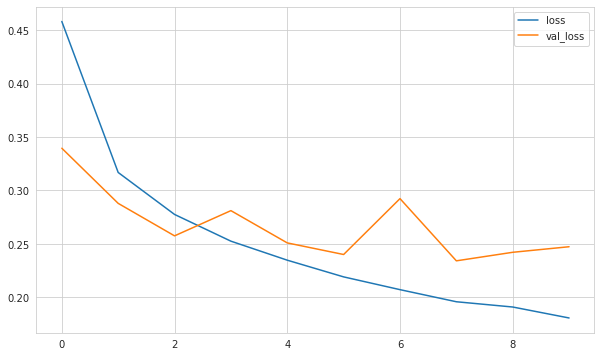

In [98]:
summary[["loss", "val_loss"]].plot();

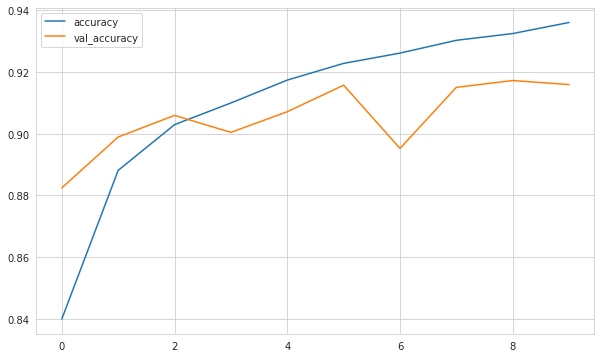

In [99]:
summary[["accuracy", "val_accuracy"]].plot();

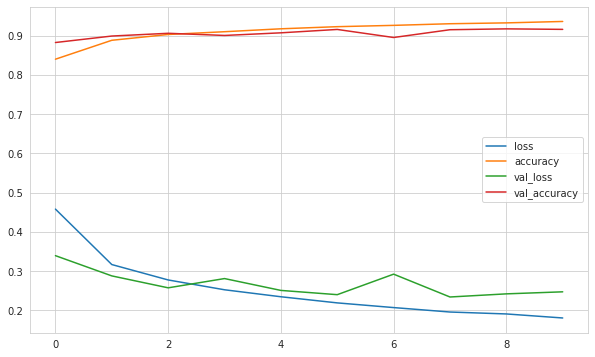

In [100]:
summary.plot()

## Model Evaluation

**TASK 8: Show the accuracy,precision,recall,f1-score the model achieved on the x_test data set. Keep in mind, there are quite a few ways to do this, but we recommend following the same procedure we showed in the MNIST lecture.**

In [101]:
from sklearn.metrics import classification_report, confusion_matrix

In [102]:
model.evaluate(X_test, Y_test)

313/313 [==============================] - 10s 31ms/step - loss: 0.2342 - accuracy: 0.9150


[0.2342148870229721, 0.9150000214576721]

In [103]:
score = model.evaluate(X_test, Y_test, verbose=0)
print('Test loss:', score[0])    
print('Test accuracy:', score[1])

Test loss: 0.2342148870229721
Test accuracy: 0.9150000214576721


In [104]:
pred_prob = model.predict(X_test)

In [105]:
y_pred = np.argmax(pred_prob, axis=1)

In [106]:
y_pred

array([9, 2, 1, ..., 8, 1, 5])

In [107]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.85      0.87      1000
           1       0.99      0.98      0.99      1000
           2       0.92      0.80      0.86      1000
           3       0.93      0.93      0.93      1000
           4       0.85      0.91      0.88      1000
           5       0.98      0.98      0.98      1000
           6       0.72      0.80      0.75      1000
           7       0.93      0.98      0.96      1000
           8       0.97      0.99      0.98      1000
           9       0.99      0.94      0.96      1000

    accuracy                           0.92     10000
   macro avg       0.92      0.92      0.92     10000
weighted avg       0.92      0.92      0.92     10000



In [108]:
classes

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [109]:
print(confusion_matrix(y_test, y_pred)) 

[[847   2   9  17   5   1 108   0  11   0]
 [  0 984   0   9   3   0   2   0   2   0]
 [ 13   1 803   6  64   0 111   0   2   0]
 [  4   2   8 925  31   0  28   0   2   0]
 [  1   1  15  12 905   0  64   0   2   0]
 [  0   0   0   0   0 984   0  11   0   5]
 [ 75   5  34  25  56   0 797   0   8   0]
 [  0   0   0   0   0  12   0 981   0   7]
 [  0   0   0   5   3   2   2   2 986   0]
 [  0   0   0   0   0   5   0  56   1 938]]


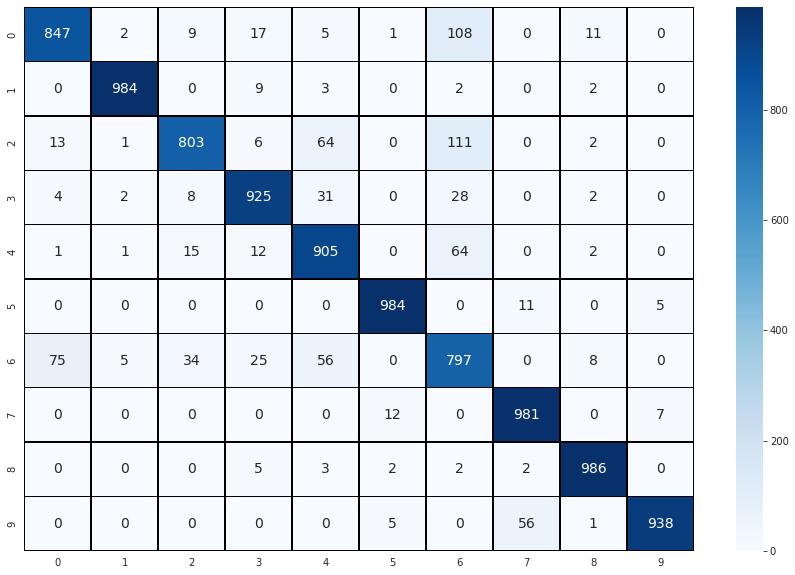

In [110]:
plt.figure(figsize=(15,10))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap="Blues", linewidths=.5, linecolor='black', fmt='g', annot_kws = {"size": 14})

## Prediction

In [111]:
my_image = X_test[44]

In [112]:
my_image.shape

(28, 28, 1)

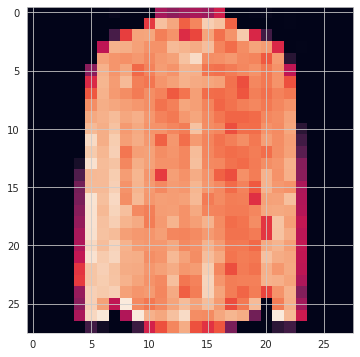

In [140]:
plt.imshow(my_image.reshape(28,28))#.squeeze()) #.reshape(28,28)

In [121]:
image_prediction = model.predict(my_image.reshape(1,28,28,1))

In [122]:
image_prediction

array([[1.4763584e-05, 7.3942024e-06, 5.6932124e-05, 2.5575637e-05,
        7.7803745e-03, 2.6623155e-07, 9.9210185e-01, 5.4946431e-06,
        7.7677072e-07, 6.6504717e-06]], dtype=float32)

In [123]:
np.argmax(image_prediction, axis=1)

array([6])

In [124]:
result=np.argmax(image_prediction, axis=1)

In [125]:
result

array([6])

In [126]:
classes[int(result)]

'Shirt'

In [128]:
model=tf.keras.models.load_model('/content/drive/MyDrive/fashion_mnist1.h5')

In [129]:
X_test[15].shape

(28, 28, 1)

In [130]:
np.expand_dims(X_test[15],axis=0).shape

(1, 28, 28, 1)

In [131]:
pred=model.predict(np.expand_dims(X_test[15],axis=0))

In [132]:
np.argmax(pred)

1

In [139]:
classes[1]

'Trouser'

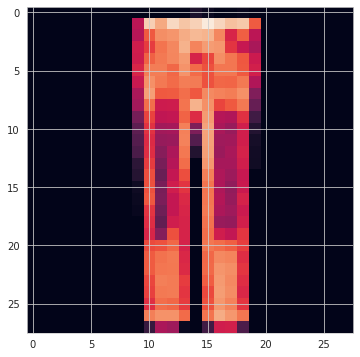

In [137]:
plt.imshow(X_test[15].reshape(28,28))

# End of Assignment

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___